ここでは、教師なし学習と呼ばれる種類の機械学習アルゴリズムを見ていく。教師なし学習には、アルゴリズムの学習に教師情報を用いないすべての種類の機械学習が含まれる。教師なし学習では、アルゴリズムには入力データだけが与えられ、データから知識を抽出することが要求される。

# 3.1 教師なし学習の種類

本章では、2種類の教師なし学習を見ていく。データセットの変換とクラスタリングである。

データセットの__教師なし変換__(Unsupervised transformations)は、もとのデータ表現を変換して、人間やほかの機械学習アルゴリズムにとって、よりわかりやすい新しいデータ表現を作るアルゴリズムのことだ。教師なし変換の利用法として最も一般的なのは次元削減だ。次元削減とは、たくさんの特徴量で構成されるデータの高次元表現を入力として、少量の本質的な特徴を表す特徴量でそのデータを表す要約方法を見つけることだ。次元削減は、可視化のために次元数を2次元に減らす際にも用いられる。

もう1つの教師なし変換のアプリケーションとして、そのデータを「構成する」部品、もしくは成分を見つけることが挙げられる。

# 3.2 教師なし学習の難しさ

教師なし学習の難しさは、アルゴリズムが学習したことの有用性の評価にある。教師なし学習のアルゴリズムにはラベル情報がまったく含まれていないデータが与えられる。このため、出力がどうあるべきなのかわからない。したがって、モデルが「よくやった」のかどうか判断するのがとても難しい。例えば、あるクラスタリングアルゴリズムが、プロフィール写真を、顔だけが大きく写ったものとそうでないものにグループ分けしたとしよう。この方法も顔写真の集合をグループ分けする方法の1つではあるが、我々が求めているものではない。しかし、アルゴリズムに我々が何を求めているのかを「教える」方法がないので、教師なし学習の結果を評価するには、結果を人間が確かめるしかない場合が多い。

# 3.3 前処理とスケール変換

前章で、ニューラルネットワークやSVMなどのアルゴリズムは、データのスケール変換に非常に敏感であることを見た。したがって、これらのアルゴリズムに適したデータ表現に変換することが広く行われている。よく使われるのは、特徴量ごとにスケールを変更してずらす方法である。下のコードは、図3-1に示す簡単な例を表示する。

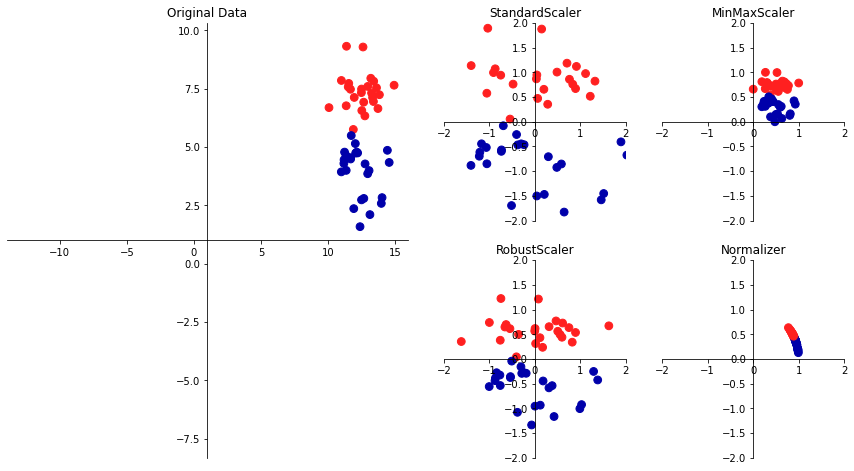

In [3]:
import mglearn
mglearn.plots.plot_scaling()

図3-1 データセットに対するさまざまなスケール変換と前処理結果

## 3.3.1 さまざまな前処理

図3-1の左のプロットは、2特徴量の2クラス分類合成データセットである。第1の特徴量（x軸）は10から15の間に、第2の特徴量（y軸）は1から9の間にある。

## 3.3.2 データ変換の適用

さまざまな変換を説明したので、scikit-learnを用いて実際に適用してみよう。__「2章 教師あり学習」__に登場したcancerデータセットを用いる。スケール変換器などの前処理手法は、教師あり学習アルゴリズムを適用する前に用いる。例として、カーネル法を用いたSVM(SVC)をcancerデータセットに適用し、MinMaxScalerを前処理に用いることにしよう。まず、データセットをロードして訓練セットとテストセットに分割する（前処理した後に構築する教師ありモデルを評価するために、訓練セットとテストセットに分けておく必要がある）。

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


復習になるが、このデータセットには30の測定結果を表す569のデータポイントがある。これを、訓練セット426サンプルと、テストセット143サンプルに分割した。

教師ありモデルを作った際と同じように、まず前処理を実装したクラスをインポートし、インスタンスを生成する。

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

次に、fitメソッドを訓練データに適用して、スケール変換器を適合させる。MinMaxScalerの場合は、fitメソッドは訓練データ中の各特徴量の最小値と最大値を計算する。__「2章 教師あり学習」__で見たクラス分類器や回帰と異なり、スケール変換器のfitメソッドにはデータ（X_train）のみを与え、y_trainは用いない。

In [6]:
scaler.fit(X_train)

MinMaxScaler()

学習した変換を適用するには、つまり実際に訓練データを__スケール変換__するには、スケール変換器のtransformメソッドを用いる。scikit-learnでは、モデルが新しいデータ表現を返す際には常にtransformメソッドが用いられる。

In [7]:
# データを変換
X_train_scaled = scaler.transform(X_train)
# スケール変換の前後のデータ特性をプリント
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


変換されたデータの配列はもとのデータのものと同じ形をしている。特徴量がシフトされ、スケール変換されているだけだ。すべての特徴量が、望んだ通り0と1の間になっているのがわかるだろう。

SVMをスケール変換されたデータに適用するには、テストセットの方も変換する必要がある。ここでもtransformメソッドを用いるが、今度はX_testに適用する。

In [8]:
# テストデータを変換
X_test_scaled = scaler.transform(X_test)
# スケール変換の前後のデータ特性をプリント
print("per-feature minimum after scaling:\n {}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


驚くかもしれないが、テストセットの場合には、スケール変換後の最小値と最大値が0と1になっていない。特徴量によっては0と1の範囲から出てしまっている。これは、MinMaxScalerが（他のスケール変換器もそうだが）常に訓練データとテストデータに、まったく同じ変換を施すからだ。transformは常に訓練データの最小値を引き、訓練データのレンジで割る。これらの値は、テストセットの最小値やレンジとは違う場合もあるのだ。

## 3.3.3 訓練データとテストデータを同じように変換する

教師ありモデルをテストセットに対して適用する際に、テストセットを訓練セットとまったく同じように変換することは重要である。下の例は、テストセットの最小値とレンジを使うと何が起こるかを示している（__図3-2__）。

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

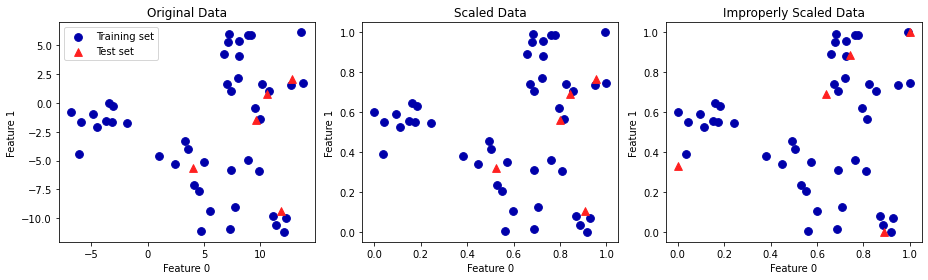

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
# 合成データを作成
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# 訓練セットとデータセットに分割
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# 訓練セットとテストセットをプロット
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# MinMaxScalerでデータをスケール変換
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# スケール変換されたデータの特性を可視化
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# テストセットを訓練セットとは別にスケール変換
# 最小値と最大値が0,1になる。ここでは説明のためにわざとやっている
# *実際にはやってはいけない！*
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 間違ってスケール変換されたデータを可視化
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()

図3-2 訓練データとテストデータに対するスケール変換の効果。左のデータを同時にスケール変換したもの（中央）と、別々に変換したもの（右）

最初のパネルは、変換されていない2次元のデータセットである。訓練セットは丸で、テストセットは三角形で表されている。2つ目のパネルは同じデータをMinMaxScalerで変換したものである。ここでは、訓練セットに対してfitしたものを使って、訓練セットとテストセットをtransformしている。2つ目のパネルのデータセットは、グラフ軸の目盛りが変わっただけで、最初のものとまったく同じに見える。すべての特徴量が0と1の間にあるわけではない。テストデータ（三角形）の最小値と最大値は0と1ではない。

3つ目のパネルは、訓練セットとテストセットを別々に変換した場合を示している。この場合、特徴量の最小値と最大値は、訓練セットもテストセットも0と1になっている。しかし、データセットが変わってしまっている。テストデータポイントと訓練データポイントが別々に変換されているので、お互いに対して動いてしまっている。データを勝手に動かしてしまったのだ。明らかにこれではまずい。

別の考え方をしてみよう。テストセットが1点しかなかったらどうだろうか？MinMaxScalerの最大値最小値に対する要求を満たすように、1点をスケール変換する方法はない。しかし、テストセットの大きさによって前処理の方法を変更するのはおかしいだろう。

### 効率のいいショートカット

あるデータセットに対して、モデルをfitしてから、transformしたいことはよくある。これは非常に一般的で、fitを呼び出してからtransformを呼び出すよりも効率的に計算できる場合がある。このような場合のために、transformメソッドを持つすべてのモデルにはfit_transformメソッドが用意されている。StandardScalerの例を見てみよう。

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fitとtransformを続けて呼ぶ（メソッドチェーンを使って）
X_scaled = scaler.fit(X).transform(X)
# 同じ結果になるがより効率的に計算される
X_scaled_d = scaler.fit_transform(X)

fit_transformはすべてのモデルに対して効率的なわけではないが、訓練データを変換する際には使ってもよいだろう。

## 3.3.4 教師あり学習における前処理の結果

さて、cancerデータセットに戻って、SVCの学習に対するMinMaxScalerの効果を見てみよう（__「2章 教師あり学習」__で同じ変換をしているが、ここでは別のやり方で行う）。まず、比較のためにもとのデータに対して再びSVCを訓練する。

In [11]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.94


さて、今度はSVCに掛ける前に」、MinMaxScalerを使ってスケール変換してみよう。

In [12]:
# 0-1スケール変換で前処理
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 変換された訓練データで学習
svm.fit(X_train_scaled, y_train)

# 変換されたテストセットでスコア計算
print("Scaled test set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


ここで示したように、データに対するスケール変換の影響は非常に大きい。スケール変換には複雑な数学は使われていないが、自分で再実装するよりは、scikit-learnが用意しているスケール変換機構を使ったほうがよいだろう。簡単な計算でも間違ってしまうことは多いからだ。

さらに、前処理のアルゴリズムを置き換えるのも、利用するクラスを変えるだけでできる。前処理のクラスはどれも、fitメソッドとtransformメソッドの同じインタフェースを持つからだ。

In [13]:
# 平均を0に分散を1に前処理
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 変換された訓練データで学習
svm.fit(X_train_scaled, y_train)

# 変換されたテストセットでスコア計算
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


ここまでは、前処理のためのデータ変換が簡単に使えることを説明した。次は、教師なし学習を用いたもっと面白いデータ変換を見ていこう。

# 3.4 次元削減、特徴量抽出、多様体学習

先に述べた通り、教師なし学習を用いたデータ変換にはさまざまな動機がある。最も一般的な動機としては、可視化、データの圧縮、以降の処理に適した表現の発見が挙げられる。

これらすべての目的に対してもっともよく用いられるアルゴリズムが、主成分分析（principal component analysis：PCA）だ。ここでは主成分分析の他に、あつ2つのアルゴリズムを見ていく。主に特徴量抽出に用いられる非負値行列因子分解（non-negative matrix factorization：NMF）と、2次元散布図を用いたデータの可視化によく用いられるt-SNEである。

## 3.4.1 主成分分析（PCA）

主成分分析とは、データセットの特徴量を相互に統計的に関連しないように回転する手法である。多くの場合、回転したあとの特徴量から、データセットを説明するのに重要な一部の特徴量だけを抜き出す。__図3-3__にPCAを合成2次元データセットに適用した例を示す。

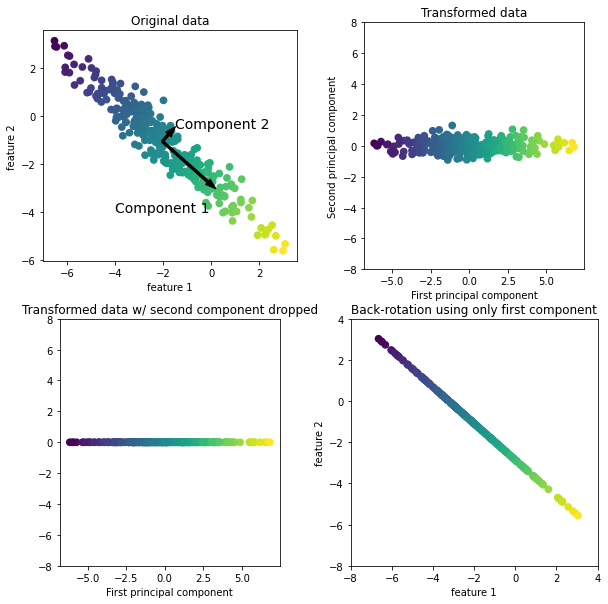

In [14]:
mglearn.plots.plot_pca_illustration()

図3-3 PCAを用いたデータ変換

最初のプロット（左上）は、もとのデータセットを示している。区別がつきやすいように色が付けてある。このアルゴリズムは、まず最も分散が大きい方向を見つけ、それに「第1成分」というラベルを付ける。データはこの方向（もしくはベクトル）に対して最も情報を持つ。つまりこの方向は、特徴量が最も相互に関係する方向である。

2つ目のプロット（右上）は、同じデータを、最初の主成分がx軸に沿い、2つ目の主成分がy軸に沿うように回転させたものである。

### 3.4.1.1 cancerデータセットのPCAによる可視化

PCAの最も一般的なアプリケーションは高次元データセットの可視化である。__「1章 はじめに」__で示したように、2つ以上の特徴量を持つデータの散布図を作ることは難しい。irisデータセットに対しては、すべての2特徴量の組み合わせを描画することでデータを部分ごとに可視化する。ペアプロット（__「1章 はじめに」__の__図1-3__）を作ることができた。しかし、cancerデータセットの場合にはペアプロットすら難しい。このデータセットには特徴量が30もあるので、30×29/2=435の散布図ができてしまうのだ。これほどの数の散布図は、理解するどころか詳細に見ることも難しいだろう。

しかし、さらに単純な可視化手法もある。特徴量ごとに2つのクラス（良性と悪性）のヒストグラムを書くのだ（__図3-4__）。

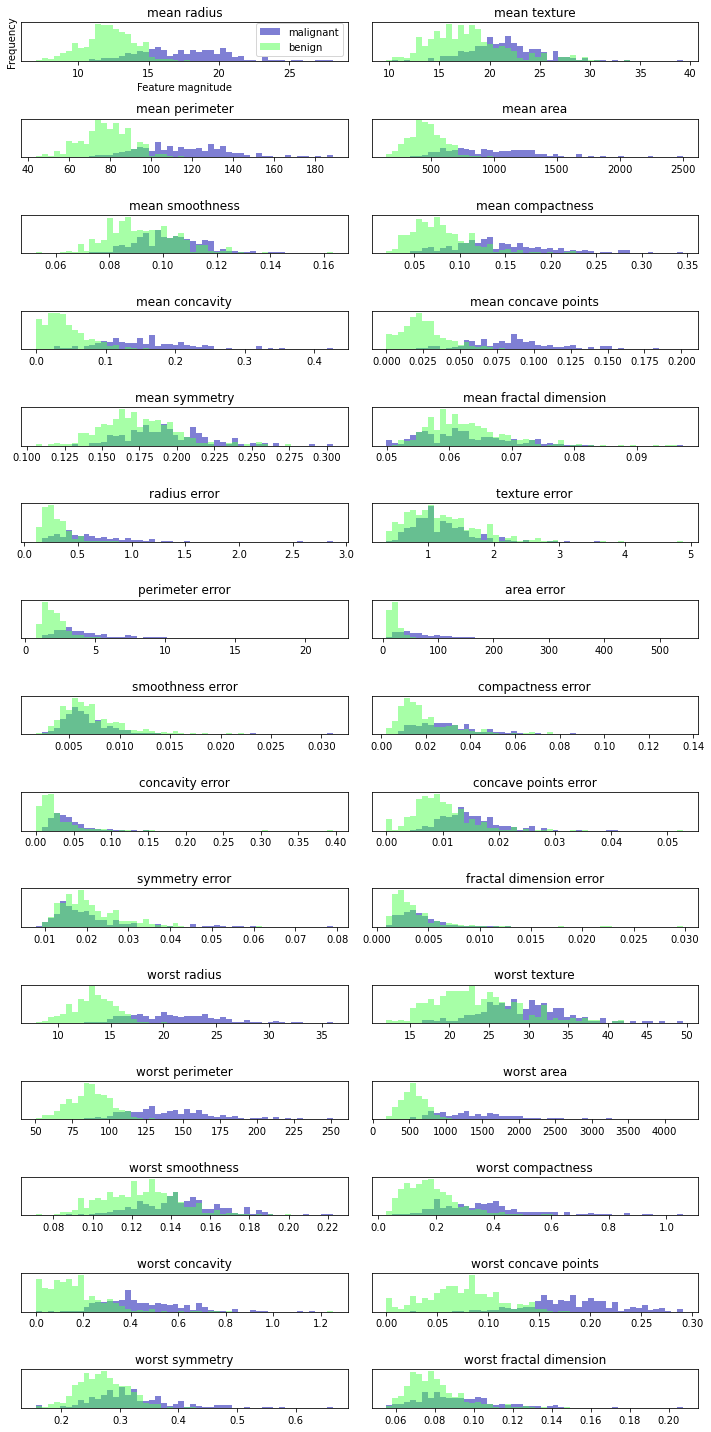

In [15]:
import numpy as np

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i] .hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

図3-4 cancerデータセットに対するクラスごとのヒストグラム

ここでは、個々のデータポイントの特徴量が特定のレンジ（__ピン__と呼ぶ）に何回入ったかを数えることで、特徴量ごとにヒストグラムを作っている。個々のプロットには良性（benign）クラスに属する点のヒストグラム（緑）と、悪性（malignant）クラスに属する点のヒストグラム（青）が重ねられている。

しかし、このプロットを見ても、個々の特徴量の相関や、それがクラス分類に与える影響については何もわからない。PCAを用いると、主な相関を捉えることができるので、もう少し全体像が見やすくなる。最初の2つの成分を用いて、2次元空間上の1つの散布図として見てみよう。

PCAを適用する前に、データをStandardScalerでスケール変換し、個々の特徴量の分散が1になるようにする。

In [16]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

PCA変換の学習と適用は、前処理変換の場合と同じように簡単だ。PCAオブジェクトを生成し、fitメソッドを呼び出して主成分を見つけ、transformメソッドを呼んで回転と次元削減を行う。デフォルトでは、PCAはデータの回転（とシフト）しか行わず、すべての主成分を維持する。データの次元削減を行うには、PCAオブジェクトを作る際に、維持する主成分の数を指定する必要がある。

In [17]:
from sklearn.decomposition import PCA
# データの最初の2つの主成分だけ維持する
pca = PCA(n_components=2)
# cancerデータセットにPCAモデルを適合
pca.fit(X_scaled)

# 最初の2つの主成分に対してデータポイントを変換
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


これで、最初の2つの主成分に対してプロットできる（__図3-5__）。

Text(0, 0.5, 'Second principal component')

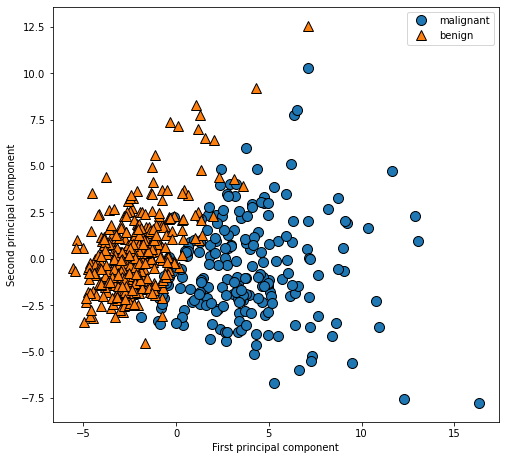

In [18]:
# 第1主成分と第2主成分によるプロット。クラスごとに色分け
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

図3-5 cancerデータセットに対する、最初の2主成分を用いた2次元プロット

PCAが教師なし手法であることに注意しよう。適切な回転を発見する際にはまったくクラス情報を用いていない。データの相関を見ているだけだ。この散布図では第1主成分に対して第2主成分を、クラス情報を使って色分けしてプロットしている。この2次元空間ではこの2つのクラスがきれいに分離できていることがわかるだろう。これを見れば（この空間での直線を学習する）線形クラス分類器でもそれなりに分類できそうだ。また、悪性のデータポイントは、良性のデータポイントよりも広がっていることもわかる。これは__図3-4__からも確かめられる。

PCAの欠点は、プロットした2つの軸の解釈が容易ではない場合が多いことだ。2つの主成分の方向はもとのデータの方向に対応しており、もとの特徴量の組合せにすぎない。しかし、この組合せは、下で見るように、一般に非常に複雑なのだ。主成分は、PCAの適合を行う過程で、components_属性に格納される。

In [19]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


components_のそれぞれの行が1つの主成分に対応する。行は重要度によってソートされている（第1主成分が最初に来る）。列は、PCA変換する前のもとの特徴量に対応する。この例では「mean radius」、「mean texture」などだ。components_の中身を見てみよう。

In [20]:
print("PCA components\n{}".format(pca.components_))

PCA components
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


係数をヒートマップで見ることもできる（__図3-6__）。こちらのほうが少しわかりやすいかもしれない。

Text(0, 0.5, 'Principal components')

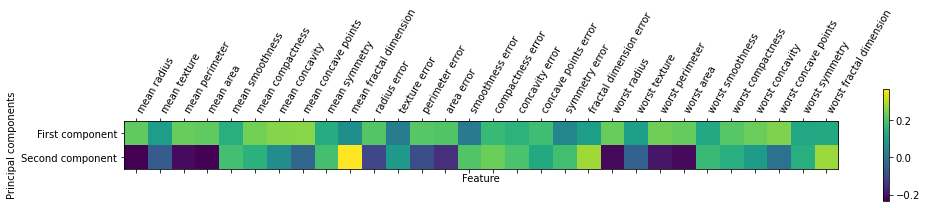

In [21]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
          cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

図3-6 cancerデータセットの2主成分のヒートマップ

第1主成分を見ると、すべての特徴量が同じ符号になっていることがわかる（ここではすべて正になっているが、前に説明した通り、矢の向きはどちらでも同じである）。これは、すべての特徴量に一般的な相関があるということを意味する。ある特徴量が大きければ、他の特徴量も大きくなる傾向にある。第2主成分の符号は入り混じっている。また、両方とも30の特徴量すべてが混ざっている。このため、__図3-6__の軸の意味を説明するのは非常に難しい。

### 3.4.1.2 固有顔による特徴量抽出

上で述べたPCAのもう1つの利用方法は特徴量抽出であった。特徴量抽出の背後には、データには与えられたもともとの表現よりも、解析に適した表現があり、それを見つけることが可能だ、という考えがある。

PCAを用いた画像からの特徴量抽出のとても簡単なアプリケーションを見てみよう。これには、Labeled Faces in the Wildデータセットの顔画像を用いる。このデータセットは、インターネットから集めた有名人の顔画像で構成されている。

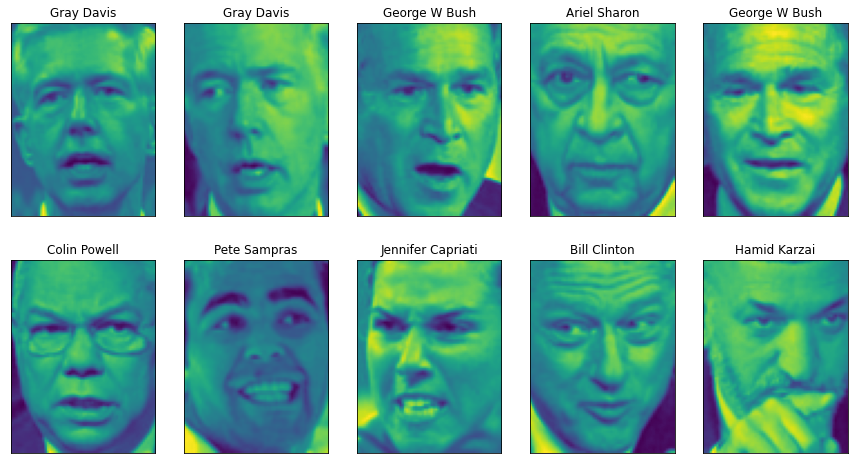

In [22]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

図3-7 Labeled Faces in the Wildデータセットの顔画像例

画像は62人分で合わせて3,023枚ある。サイズは87×65ピクセルである。

In [23]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (2936, 87, 65)
Number of classes: 59


しかしこのデータセットは少し偏っている。下に示す通り、ジョージ・W・ブッシュとコリン・パウエルの画像が多いのだ。

In [24]:
# 各ターゲットの出現回数をカウント
counts = np.bincount(people.target)
# ターゲット名と出現回数を並べて表示
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='    ')
    if(i + 1) % 3 == 0:
        print()

Alejandro Toledo           39    Alvaro Uribe               35    Amelie Mauresmo            21    
Andre Agassi               36    Angelina Jolie             20    Ariel Sharon               77    
Arnold Schwarzenegger      42    Atal Bihari Vajpayee       24    Bill Clinton               29    
Carlos Menem               21    Colin Powell              236    David Beckham              31    
Donald Rumsfeld           121    George Robertson           22    George W Bush             530    
Gerhard Schroeder         109    Gloria Macapagal Arroyo    44    Gray Davis                 26    
Hamid Karzai               22    Hans Blix                  39    Hugo Chavez                71    
Igor Ivanov                20    Jack Straw                 28    Jacques Chirac             52    
Jean Chretien              55    Jennifer Aniston           21    Jennifer Capriati          42    
Jennifer Lopez             21    Jeremy Greenstock          24    Jiang Zemin                20    


偏りを減らすために、各人の画像を50に制限する。

In [25]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0から255で表現されている、グレースケールの値0と1の間に変換
# こうしたほうが、数値的に安定する
X_people = X_people / 255.

C:\Users\user\AppData\Local\Temp\ipykernel_3120\3228878190.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype=np.bool)


顔認識の一般的なタスクとして、見たことない顔が、データベース中の人物と一致するかを判別するタスクがある。

簡単な方法として、1-最近傍法クラス分類器を使う方法がある。クラス分類しようとしている顔に一番近い物を探すわけだ。このクラス分類器は、理論的にはクラスごとに訓練サンプルが1つだけあれば機能するはずだ。KNeighborsClassifierがどのくらいうまく機能するか見てみよう。

In [26]:
from sklearn.neighbors import KNeighborsClassifier
# 訓練セットとテストセットにデータを分割
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# KNeighborsClassifierを1-最近傍で構築
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.21


精度は21%だった。これは62クラス分類であることを考えるとそれほど悪くない（ランダムに選択すると1/62=1.5%になる）が、それほど良くもない。5回に1度しか人物を特定できないのだ。

ここで、PCAの出番だ。もとのピクセルの空間で距離を計算するのは、顔の近似度を測るのにはまったく適していない。ピクセル表現で2つの画像を比較するということは、相互の画像の対応するピクセルの値を比較することになる。この表現は、人間が顔画像を解釈する方法とはまったく異なるし、顔の特徴をこのような生の表現から捉えるのはとても難しい。例えば、ピクセルで距離を測ると、1ピクセル顔を右にずらすだけで、表現がまったく変わってしまい、大きく変化したことになる。主成分に沿った距離を使うことで、精度が上げられないか試してみよう。ここでは、PCAのwhitenオプションを使っている。これを用いると、主成分が同じスケールになるようにスケール変換する。PCAによる変換後にStandardScalerをかけるのと同じだ。__図3-3__のデータを使って考えると、whitenオプションを付けると、データを回転するだけでなく、楕円ではなく円を描くようにスケール変換することになる（__図3-8__を参照）。

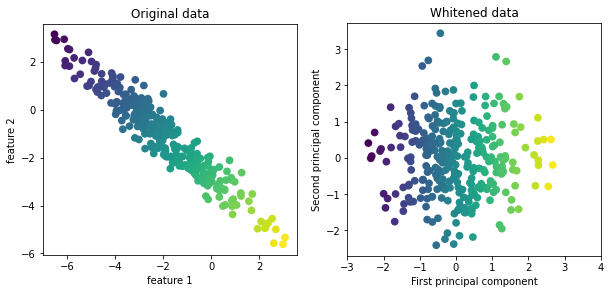

In [27]:
mglearn.plots.plot_pca_whitening()

図3-8 whitenオプション付きでPCA変換したデータ

PCAオブジェクトを訓練し、最初の100主成分を抜き出す。そして、訓練データとテストデータを変換する。

In [28]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1482, 100)


新しいデータは100の特徴量を持つ。主成分の最初の100要素である。この新しい表現を使って、1-最近傍法クラス分類器にかけてみよう。

In [29]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.28


精度は著しく向上し、21%から28%になった。このことは、主成分がデータのより良い表現となっているのではないかという我々の直感を裏付けている。

画像データについては、見つけた主成分を容易に可視化することができる。主成分が、入力空間の方向に対応するという話を覚えているだろう。ここでの入力空間は、87×65ピクセルのグレースケール画像なので、この空間での方向は、87×65ピクセルのグレースケール画像になる。

最初のいくつかの主成分を見てみよう（__図3-9__）。

In [30]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


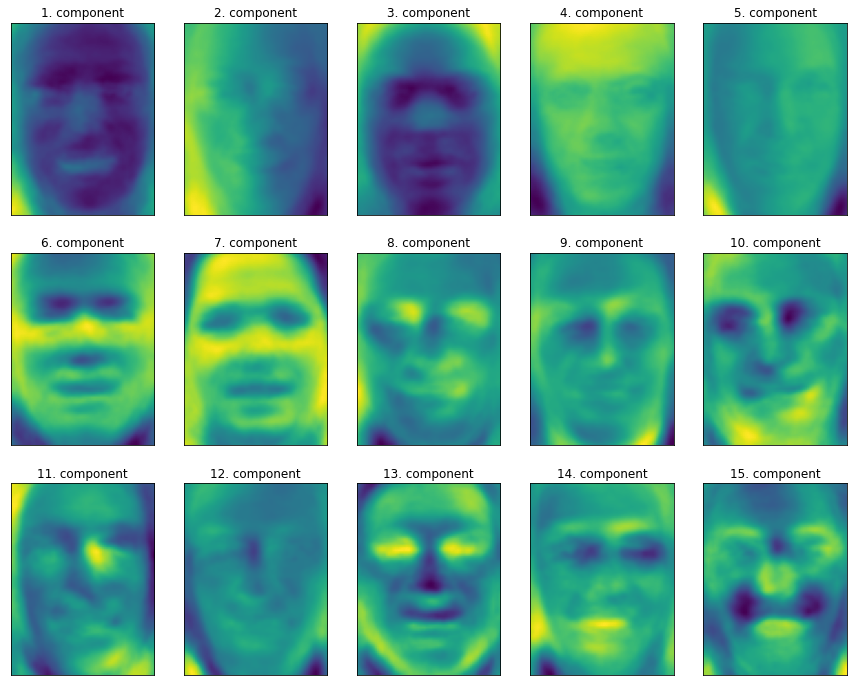

In [31]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
              cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

これらが顔画像のどの側面を捉えているのか、すべてを理解することはもちろんできないが、いくつかに関しては推測することができる。例えば、最初の主成分は、顔と背景のコントラストをコーディングしていて、2つ目の主成分は、光のあたり方による顔の左右の明るさの差をコーディングしているように見える。

PCA固有の話に戻ろう。

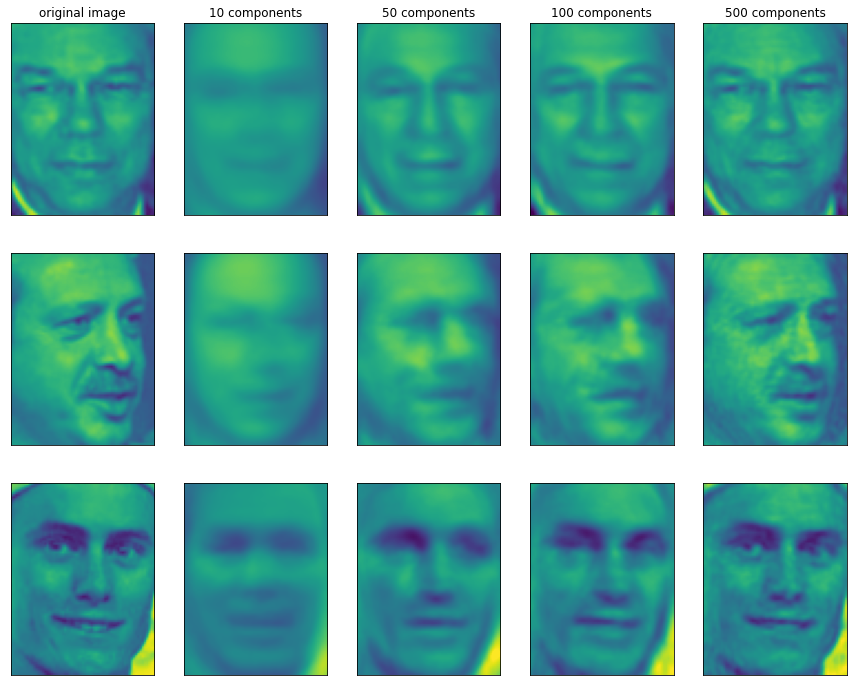

In [32]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

図3-11 さまざまな数の主成分を用いた3つの顔画像の再構成

cancerデータセットで行ったのと同様に、PCAを用いてデータセット中のすべての顔を最初の2つの主成分を用いて散布図をプロットしてみよう（__図3-12__）。クラスは画像中の人物である。

Text(0, 0.5, 'Second principal component')

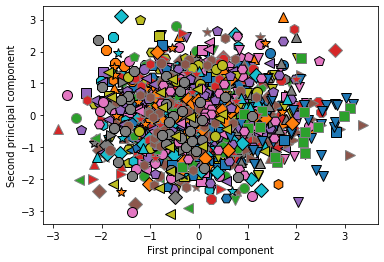

In [33]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

図3-12 最初の2つの主成分を用いた顔画像データセットの散布図（これに対応するcancerデータセットの画像は__図3-5__）

## 3.4.2 非負値行列因子分解（NMF）

非負値行列因子分解（Non-negative matrix factorization：NMF）も、有用な特徴量を抽出することを目的とする教師なし学習手法である。このアルゴリズムの動作はPCAと似ており、やはり次元削減に用いることができる。__図3-10__で示したPCAの場合と同様に、個々のデータポイントをいくつかの成分の重み付き和として表現したい。PCAでは、個々の成分はデータの分散を可能な限り説明する互いに直交するものでなければならなかった。NMFでは係数と成分が非負であること、つまり、成分とその係数が常にゼロ以上であることが求められる。したがって、この方法は個々の特徴量が非負のデータにしか適用できない。非負の成分を非負係数で重み付き和を取ると非負にしかならないからだ。

データを非負の重み付き和に分解する方法は、いくつもの独立した発生源から得られたデータを重ね合わせて作られるようなデータに対して特に有効だ。例えば、複数の人が話している音声データや、多数の楽器からなる音楽などだ。このような場合、NMFを用いると、組み合わされたデータを作り上げているもとの成分を特定することができる。まとめると、NMFは、PCAよりも理解しやすい成分に分解してくれる。負の成分や係数があると、お互いに打ち消してしまう理解しづらい挙動になるが、NMFにはそれがない。NMFを顔画像データセットに適用する前に、まず合成データで試してみよう。

### 3.4.2.1 NMFの合成データへの適用

PCAを使う場合と異なり、NMFが扱えるように、データがすべて正であるようにしなければならない。これは、原点(0, 0)に対してどの位置にあるかということが、NMFでは問題になることを意味する。したがって、抽出された非負の成分は、原点からデータへの方向だと考えることができる。

__図3-13__に示すプロットは、2次元のトイデータにNMFを適用した結果である。

C:\Users\user\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


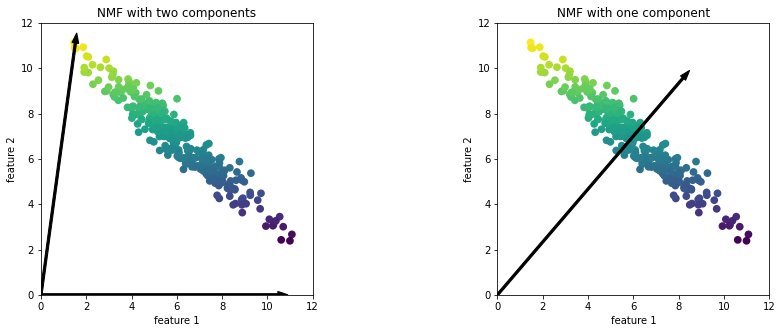

In [34]:
mglearn.plots.plot_nmf_illustration()

図3-13 非負値行列因子分解で見つかった2つの成分（左）と1つの成分（右）

左側に示した2成分のNMFでは、すべてのデータが2つの成分の正係数の重み付き和で表現できることは明らかだ。完全にデータを再現するのに十分な数の成分がある場合には（つまり、特徴量と同じだけの成分がある場合には）、このアルゴリズムはデータの極端な部分の方向を向く。

1つしか成分を使わない場合には、NMFは、データの平均値へ向かう成分を作る。この点が、最もデータをよく説明するからだ。PCAの場合と異なり、成分の数が変わると、いくつかの成分がなくなるのではなく、まったく別の成分集合が構成されるのだ。また、NMFの成分は特定な順番で並んでいるわけではない。したがって、「最初の非負成分」などというものはない。すべての成分が同等なのだ。

NMFは、乱数初期化を用いる。このため、乱数シードが変わると結果が変わる場合がある。

### 3.4.2.2 NMFの顔画像への適用

さて、MMFを前にも使ったLabeled Faces in the Wildデータセットに適用してみよう。

まず、成分の数がNMFから再構成したデータの質に与える影響を見てみよう（__図3-14__）。

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.202614, ..., 0.180392],
       ...,
       [0.203922, ..., 0.113725]], dtype=float32), 
array([[0.65098 , ..., 0.104575],
       ...,
       [0.484967, ..., 0.415686]], dtype=float32))


C:\Users\user\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:28

_____________________________________________________nmf_faces - 649.9s, 10.8min


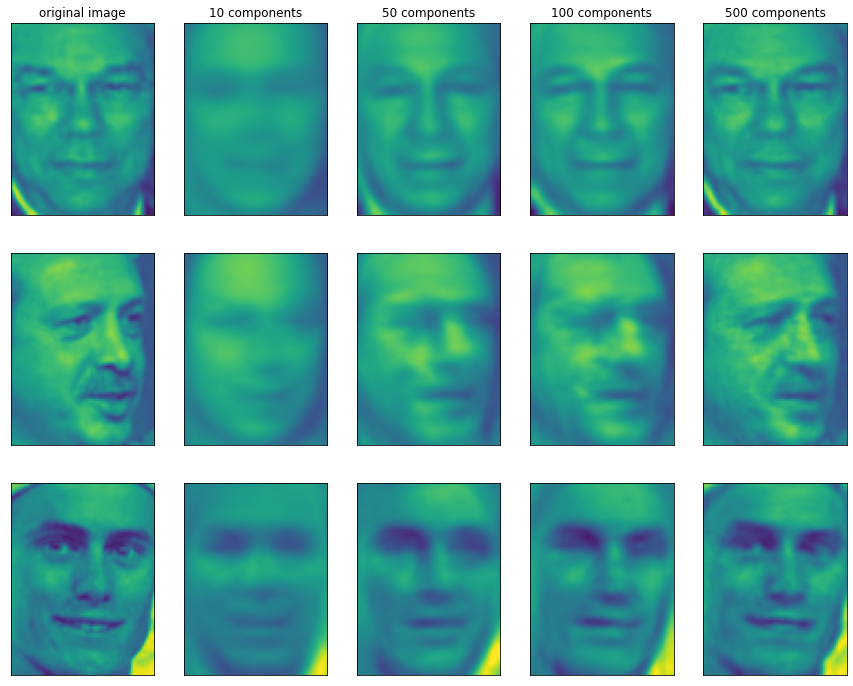

In [38]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

図3-14 NMFでさまざまな数の成分を用いた3つの顔画像の再構成（上は実行に20分くらいかかった。）

逆変換したデータの質は、PCAを用いたときと似た傾向だが、少し悪い。PCAは再構成に最適な方向を見つけるので、これは予期した通りだ。NMFは再構成やデータのエンコードに用いられるよりは、データ中から興味深いパターンを見つけるのに用いられる。

データを見る手始めとして、最初の15の成分を見てみよう（__図3-15__）。

C:\Users\user\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


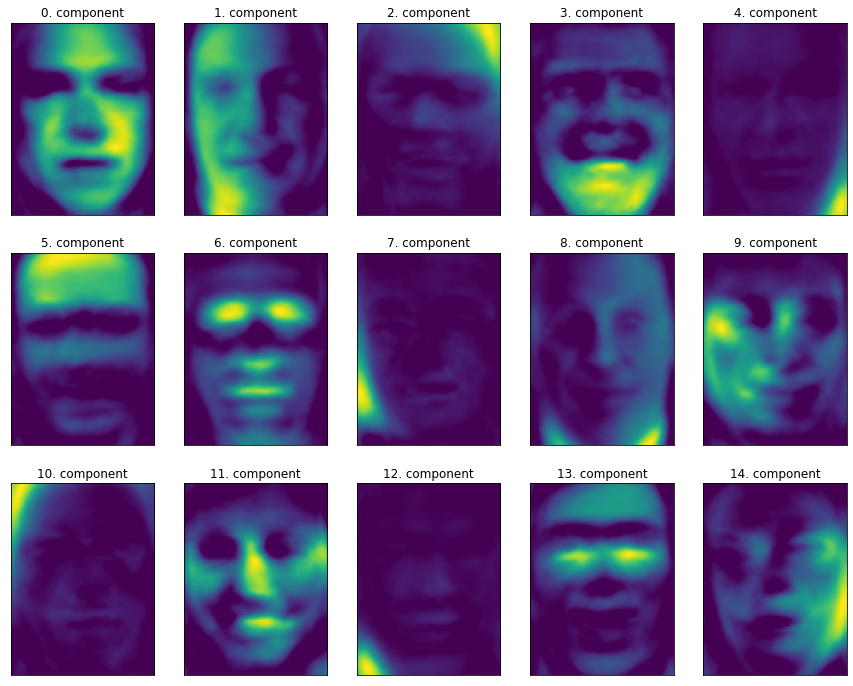

In [37]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

成分はすべて正なので、__図3-9__に示したPCAで得られた成分よりもはるかに顔のプロトタイプを捉えている。例えば、成分3は少し右を向いた顔を、成分7は少し左を向いた顔を表していることがわかるだろう。__図3-16__と__図3-17__に示す、これらの成分が特に強い画像を見てみよう。

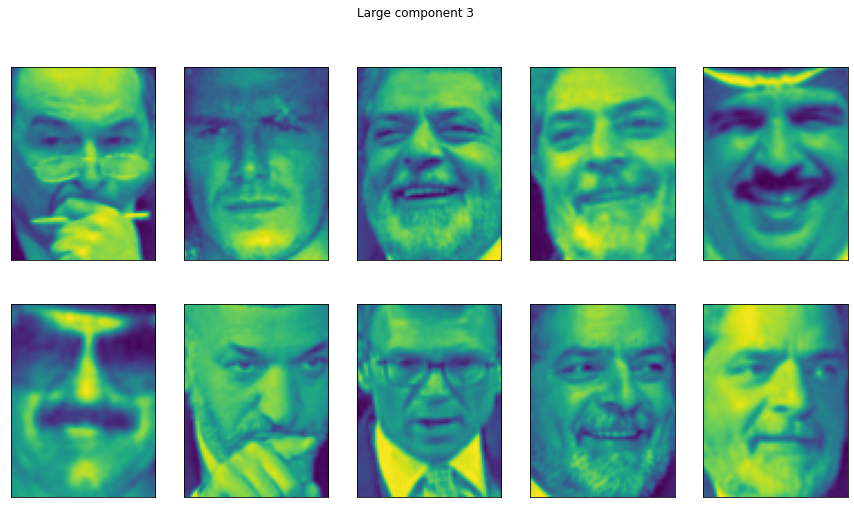

In [42]:
compn = 3
# 3つ目の成分でソート、最初の10画像を表示
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Large component 3")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

図3-16 成分3の係数が大きい顔画像

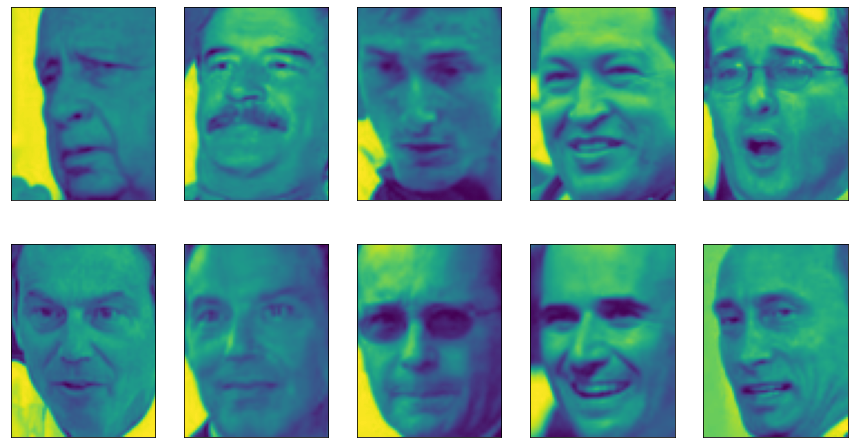

In [41]:
compn = 7
# 7つ目の成分でソート、最初の10画像を表示
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig.suptitle("Large component 7")
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

図3-17 成分7の係数が大きい顔画像

予想される通り、成分3の係数が大きい顔画像は右を向いており（__図3-16__）、成分7の係数が大きい顔画像は左を向いている（__図3-17__）。前にも述べたように、このようなパターン抽出は、追加していく構造を持つデータに対して最もうまく機能する。例えば、音声データ、遺伝子発現、テキストデータなどだ。合成データを例として見てみよう。

3つの信号源からの信号が組み合わされた信号に興味があるとしよう（__図3-18__）。

Text(0, 0.5, 'Signal')

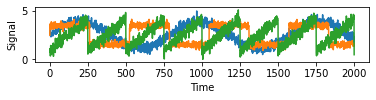

In [43]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

残念ながら、もとの信号を観測することはできず、この3つが混ざったものだけが観測できるとしよう。混ざった信号を分解して、もとの成分を取り出してみよう。混合信号を観測する方法はたくさんあるとしよう（例えば、100計測機器があるとする）。それぞれから一連の計測結果が得られる。

In [44]:
# データを混ぜて100次元の状態を作る
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))

Shape of measurements: (2000, 100)


NMFを用いて、この3つの信号を復元することができる。

In [45]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Recovered signal shape: {}".format(S_.shape))

Recovered signal shape: (2000, 3)


C:\Users\user\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


比較のためにPCAも使ってみよう。

In [46]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

__図3-19__にNMFとPCAが発見した信号を示す。

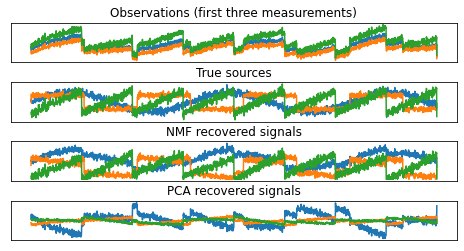

In [47]:
models = [X, S, S_, H]
names = ['Observations (first three measurements)',
        'True sources',
        'NMF recovered signals',
        'PCA recovered signals']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
                        subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

一番上のプロットは、参照のため、100個の計測結果のうちの3つを示している。NMFはもとの信号源をかなりうまく特定できていることがわかる。一方、PCAは第1主成分をデータの大きな変動を説明するのに使っており、信号源の特定には失敗している。

PCAやNMFと同じように、個々のデータポイントを固定数の成分集合の重み付き和に分解するのに利用できるアルゴリズムは、他にもたくさんある。

## 3.4.3 t-SNEを用いた多様体学習

データを変換して散布図で可視化したいときには、まずPCAを試してみるのは悪くないが、この手法の（回転していくつかの方向を落とすという）性質上、その有用性は限られる。これはLabeled Faces in the Wildデータセットの散布図で見た通りである。これに対して、可視化によく用いられる、__多様体学習アルゴリズム__（manifold learning algorithms）と呼ばれる一連のアルゴリズムがある。

多様体学習アルゴリズムは主に可視化に用いられ、ほとんどの場合、3以上の新しい特徴量を生成するように利用することはない。さらに多様体学習アルゴリズムの一部（t-SNEを含む）は、訓練データの新たな表現を計算するが、新しいデータを変換することはできない。つまり、テストセットにこれらのアルゴリズムを適用することはできない。訓練に使ったデータを変換することしかできないのだ。t-SNEは、データポイントの距離を可能な限り維持する2次元表現を見つけようとする。

t-SNE多様体学習をscikit-learnに入っている手書き数字データセット（digitsデータセット）に適用してみよう。このデータセットの個々のデータポイントは8×8のグレースケールの0から9までの手書き数字である。画像例を__図3-20__に示す。

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                        subplots_kw={'xticks':(), })